# Lesson 1a: Perceptron Learning

In this lesson you will implement one of the first algorithms from the history of neural networks: the perceptron.

You will NOT yet be using Keras/TensorFlow or other machine learning toolkits for this problem. Instead, you will implement the perceptron learning rule yourself, from scratch, in Python, by filling out the _TODO_'s in the cells below.

We implement the perceptron learning rule from scratch in Python to gain familiarity with the fundamentals of how the perceptron works, without the magic of a framework like Keras or TensorFlow hiding anything from us.  Very soon, we'll start using contemporary deep learning frameworks.  The frameworks let you quickly build and train complex neural architectures without having to fuss with low level implementation details as we do this week for pedagogical reasons.

If you find the Python programming this week a bit of a nuisance, take heart: things will not remain that way for long.

In [1]:
# Import some basic libraries for numerics, plotting and datasets

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [2]:
# import sys
# !pip3 install matplotlib --user
# !pip3 install scikit-learn --user

In [3]:
# Import the 'iris' dataset.
#   If you're unfamiliar with this dataset you might want to explore it a bit in the notebook, looking at the size
#   of the dataset, the structure of the examples in it, etc.  Doing so might also be a good refresher on how to
#   manipulate NumPy arrays, a skill that we'll need repeatedly in the course work to come.

iris = datasets.load_iris()
X = iris.data[:, :2]  # Use the first two features.
y = iris.target
x_min = min(X[:, 0])
x_max = max(X[:, 0])

In [4]:
print(X.shape)
print(X[0])
np.argwhere(np.isnan(X))

(150, 2)
[5.1 3.5]


array([], shape=(0, 2), dtype=int64)

In [5]:
print(np.unique(y))

[0 1 2]


In [6]:
print(x_min, x_max)

4.3 7.9


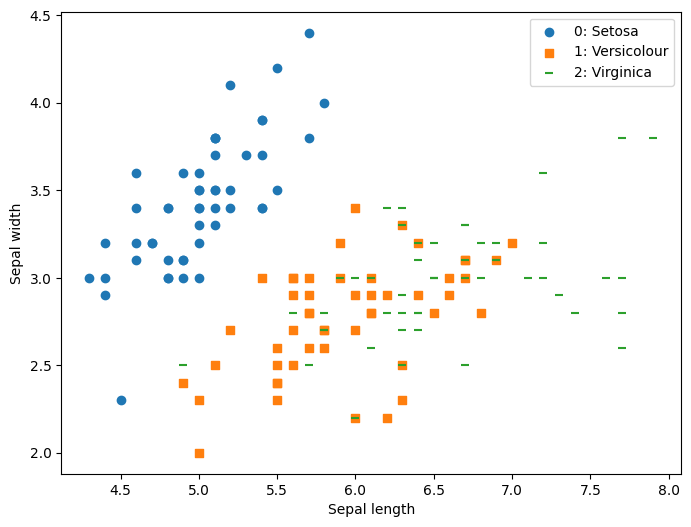

In [7]:
# Plot the data points.
#   You're free to just use 'make_plot', and take it as a given, but if you have the time, exploring
#   Matplotlib and its use is likely to be beneficial, since good plots can be very helpful for
#   understanding, debugging, and communicating results to others.

def make_plot():
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '_']
    colors = 'tab:blue', 'tab:orange', 'tab:green'
    for i, cat in enumerate(np.unique(y)):
        plt.scatter(X[:, 0][y==cat], X[:, 1][y==cat], c=colors[i], marker=markers[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend(['0: Setosa', '1: Versicolour', '2: Virginica'])
make_plot()

## Build a Perceptron to Distinguish Setosa From the Other Two Varieties

Versicolour and Virginica are intermixed in this plot; note that some datapoints have identical (length, width) values but different categories! Thus, we will focus on distinguishing Setosa from the other two flowers, because perceptrons require data to be linearly separable and Setosa is linearly separable from its counterparts. Versicolour and Virginica are clearly jumbled together in a way that you can see isn't linearly separable.

The perceptron you'll create will have a simple structure:
    
- Two input nodes: one for Sepal length, one for Sepal width.
- One output node: the output will be 0 for Setosa (category 0), and 1 for either of the other two categories.

Fill out the _TODO_'s in the following cell.

In [8]:
class Perceptron():
    """Simple perceptron with 2 inputs and 1 output."""
    
    def __init__(self):
        # Initialize the perceptron weights and the bias term.
        self._w = np.zeros(2) # TODO: Initialize weights to a vector of two zeros
        self._b = 0 # TODO: Initialize bias to a scalar value of 0
    
    def predict(self, x, display=False):
        """x is the input weight vector. Output is the result of running the perceptron on this input."""
        z = np.dot(x, self._w) + self._b # TODO: Compute dot product of x and model weights plus bias
        if display:
            print ('sum+bias = %f' % z)
        return 1 if z > 0 else 0
    
    def accuracy(self, x, y):
        """Compute the total % accuracy over a set of inputs x and corresponding outputs y."""
        # TODO: No code to add here, just read it over to remind yourself what accuracy
        #       means and how to compute it in practice.
        correct = 0
        for i in range(len(x)):
            example_x = x[i]
            example_y = y[i]
            if self.predict(example_x) == example_y:
                correct += 1
        return float(correct) / len(x)
            
    def update_weights(self, x, target):
        """Update the perceptron's weights according to the perceptron learning rule.
        
        x is an input example, and target is the desired output."""
        result = self.predict(x) # TODO: Compute prediction for input x
        diff = (result - target)
        self._b -= diff # TODO: Update bias according to perceptron rules
        self._w -= diff * x # TODO: Update weights according to perceptron rules
    
    def train(self, x, y, num_iterations, verbose=False):
        """Train the perceptron for the given number of iterations on the input data x with 
        corresponding target values y."""
        assert(len(x) == len(y))
        # TODO: Understand what the training loop is doing as you complete the TODOs below...
        for i in range(num_iterations):
            print('Iter #%d' % i)
            for j in range(len(x)): # for each row/sample
                example_x = x[j] # TODO: Get the j-th input training example input
                example_y = y[j] # TODO: Get the j-th training example label
                prediction = self.predict(example_x, display=verbose)
                if verbose:
                    print('Target: %d. Actual: %f' % (example_y, prediction))
                self.update_weights(example_x, example_y)
            print('Weights:', self._w)
            print('Bias:', self._b)  
            acc = self.accuracy(x, y)
            print('Accuracy: %.3f%%' % (acc * 100))
            print()

In [9]:
# Here is a helper function that will produce a random shuffle of the entries in
# the vector of features, x, and the vector of labels, y.  We perform the shuffle
# so that any peculiarities of the order the data is presented in don't taint our
# training process. Such shuffling is generally a good practice since in many data
# sets you might find data has arrived in a pre-sorted way due to pre-processing or
# incidental properties of how the data was collected.

def get_shuffled_data(x, y):
    # Shuffle data and outputs.
    # Create shuffle pattern of indices.
    s = np.arange(x.shape[0])
    np.random.shuffle(s)
    # Apply suffle pattern to x and y.
    x_shuffled = x[s]
    y_shuffled = y[s]
    return x_shuffled, y_shuffled

In [10]:
# Map data labels to just two categories.
y_two_categories = np.array([0 if i==0 else 1 for i in y])

In [11]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories)

In [12]:
p = Perceptron()
p.train(X_shuffled, y_shuffled, 1)

Iter #0
Weights: [  6.8 -10.7]
Bias: -2
Accuracy: 99.333%



## Plot the Learned Perceptron Decision Boundary

Our perceptron makes decisions based on the value of $b + w_1x_1 + w_2x_2$, which defines the
separating line (or in higher dimensions, separating _hyperplane_) of the perceptron.

Solve for $x_2$ (the y axis in the plot above).

That is, write $x_2$ as a function of $b, w_1, x_1, w_2$:  

$$x_2 = (-b - w_1x_1) / w_2$$

In [13]:
def get_y_decision_boundary(x1, perceptron):
    b = perceptron._b # TODO: Get the bias your perceptron learned
    w1 = perceptron._w[0] # TODO: Get the w1 weight value your perceptron learned
    w2 = perceptron._w[1] # TODO: Get the w2 weight value your perceptron learned
    return 0 if w2==0 else (-b-(w1*x1))/w2 # TODO: Compute the formula described immediately above

In [14]:
y1 = get_y_decision_boundary(x_min, p)
y2 = get_y_decision_boundary(x_max, p)

In [15]:
y1, y2

(2.5457943925233657, 4.833644859813086)

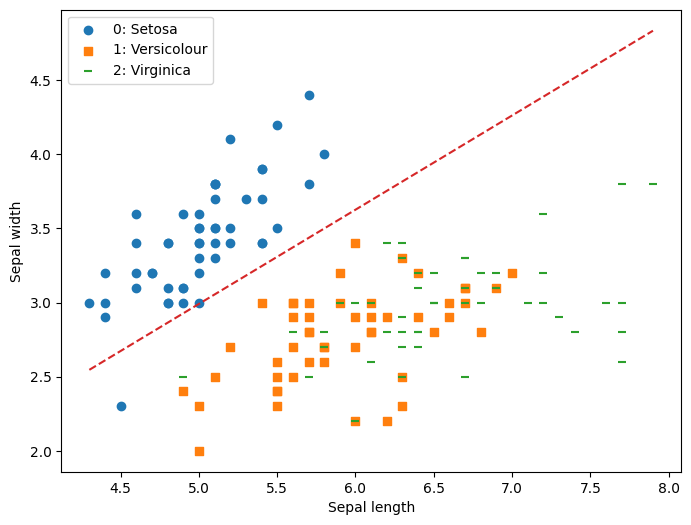

In [16]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Assess Your Handiwork

Pause and examine your handiwork.  Does your perceptron produce a nice boundary that separates the Setosa data points from the data points for the other two classes?

Yes it does. Although, it doesn't produce a perfect boundry because there is one point that is misclassified.

## Another model

Build a new model, but this time group categories 0 and 1 together, so we can try to separate out Virginica.

In [21]:
y_two_categories_2 = np.array([0 if i==2 else 1 for i in y])

In [22]:
X_shuffled, y_shuffled = get_shuffled_data(X, y_two_categories_2)
p2 = Perceptron()
p2.train(X_shuffled, y_shuffled, 10)

Iter #0
Weights: [-0.9 13.3]
Bias: 5
Accuracy: 66.667%

Iter #1
Weights: [-6.1 22.8]
Bias: 9
Accuracy: 66.667%

Iter #2
Weights: [-8.1 25.9]
Bias: 12
Accuracy: 66.667%

Iter #3
Weights: [-8.6 26.4]
Bias: 15
Accuracy: 66.667%

Iter #4
Weights: [-11.7  26.5]
Bias: 17
Accuracy: 67.333%

Iter #5
Weights: [-11.8  27.4]
Bias: 19
Accuracy: 67.333%

Iter #6
Weights: [-12.2  28. ]
Bias: 21
Accuracy: 67.333%

Iter #7
Weights: [-12.6  28.6]
Bias: 23
Accuracy: 66.667%

Iter #8
Weights: [-14.5  31.6]
Bias: 25
Accuracy: 67.333%

Iter #9
Weights: [-15.   32.2]
Bias: 27
Accuracy: 67.333%



In [23]:
y1 = get_y_decision_boundary(x_min, p2)
y2 = get_y_decision_boundary(x_max, p2)

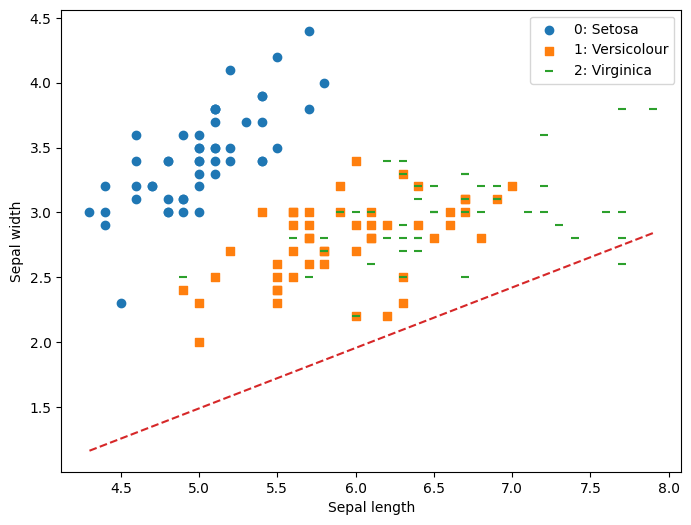

In [24]:
make_plot()
plt.plot([x_min,x_max], [y1,y2], ls='dashed', c='tab:red')

## Assess Your Handiwork

How well did your perceptron do when trying to separate things when one category contained by Setoas and Versicolour and the other category contained Virginica, whose examples are nastily mixed in with those of Versicolour?

Even though the accuracy is about 67%, the precision and recall metrics might be worse because the boundry in the above plot is terrible.

# Discussion -- What You Should Have Seen

The first perceptron did very well, only misclassifying a single Setosa example as not-Setosa; however, depending on the random order of examples, I sometimes got worse results. In general, though, the model usually did well separating the classes. I achieved results in the high 90%s (like 99% accuracy sometimes).

The second perceptron didn't do very well, and had trouble separating Virginica, with accuracy typically more in the 60% range. Such an outcome wasn't surprising, since the Virginica and Versicolour classes are not linearly separable.